### Importing packages


In [4]:
# importing packages and reading the csv file

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/survey_results_public.csv")

In [5]:
# printing the first five rows
df.head()

ResponseId                                         MainBranch  \
0           1                                      None of these   
1           2                     I am a developer by profession   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

            Employment                            RemoteWork  \
0                  NaN                                   NaN   
1  Employed, full-time                          Fully remote   
2  Employed, full-time  Hybrid (some remote, some in-person)   
3  Employed, full-time                          Fully remote   
4  Employed, full-time  Hybrid (some remote, some in-person)   

                           CodingActivities  \
0                                       NaN   
1  Hobby;Contribute to open-source projects   
2                                     Hobby   
3              I don’t code outside of work   
4                                     Hobby   

                                           EdLevel  \
0                                              NaN   
1                                              NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1                                                NaN   
2  Books / Physical media;Friend or family member...   
3  Books / Physical media;School (i.e., Universit...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline LearnCodeCoursesCert  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2  Technical documentation;Blogs;Programming Game...                  NaN   
3                                                NaN                  NaN   
4  Technical documentation;Blogs;Stack Overflow;O...                  NaN   

  YearsCode  ... TimeSearching TimeAnswering Onboarding ProfessionalTech  \
0       NaN  ...           NaN           NaN        NaN              NaN   
1       NaN  ...           NaN           NaN        NaN              NaN   
2        14  ...           NaN           NaN        NaN              NaN   
3        20  ...           NaN           NaN        NaN              NaN   
4         8  ...           NaN           NaN        NaN              NaN   

  TrueFalse_1 TrueFalse_2 TrueFalse_3           SurveyLength  \
0         NaN         NaN         NaN                    NaN   
1         NaN         NaN         NaN               Too long   
2         NaN         NaN         NaN  Appropriate in length   
3         NaN         NaN         NaN  Appropriate in length   
4         NaN         NaN         NaN               Too long   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                   Difficult                 NaN  
2  Neither easy nor difficult             40205.0  
3                        Easy            215232.0  
4                        Easy                 NaN  

[5 rows x 79 columns]

In [6]:
# selcting the columns to keep
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]

df.head()

Country  \
0                                                NaN   
1                                             Canada   
2  United Kingdom of Great Britain and Northern I...   
3                                             Israel   
4                           United States of America   

                                           EdLevel YearsCodePro  \
0                                              NaN          NaN   
1                                              NaN          NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   

            Employment  ConvertedCompYearly  
0                  NaN                  NaN  
1  Employed, full-time                  NaN  
2  Employed, full-time              40205.0  
3  Employed, full-time             215232.0  
4  Employed, full-time                  NaN

In [7]:
#renaming convertcomp column
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)


In [8]:
# dropping null values from salary column
df = df[df["Salary"].notnull()]
df.head()

Country  \
2   United Kingdom of Great Britain and Northern I...   
3                                              Israel   
8                                         Netherlands   
10  United Kingdom of Great Britain and Northern I...   
11                           United States of America   

                                            EdLevel YearsCodePro  \
2   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
3      Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
8   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            6   
10     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            2   
11     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           10   

                                           Employment    Salary  
2                                 Employed, full-time   40205.0  
3                                 Employed, full-time  215232.0  
8                                 Employed, full-time   49056.0  
10                                Employed, full-time   60307.0  
11  Employed, full-time;Independent contractor, fr...  194400.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [10]:
#dropping null values in other columns
df = df.dropna()
#printing sum of all null values in all columns
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [11]:
#keeping only data where employment was fultime
df = df[df["Employment"] == "Employed, full-time"]
#dropping employment column
df = df.drop("Employment",axis=1)
#printing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [12]:
# printing country value counts
df["Country"].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [13]:
""" This function will look into the data and select country where
    the limit cutoff is not reached and group  them to a column
    called others
"""

def shorten_categories(categories, cutoff):
  categorical_map = {}
  for i in range(len(categories)):
    if categories.values[i] >= cutoff:
      categorical_map[categories.index[i]] = categories.index[i]
    else:
      categorical_map[categories.index[i]] = 'Others'
  return categorical_map


In [14]:
# Excuting the function
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Others                                                  8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


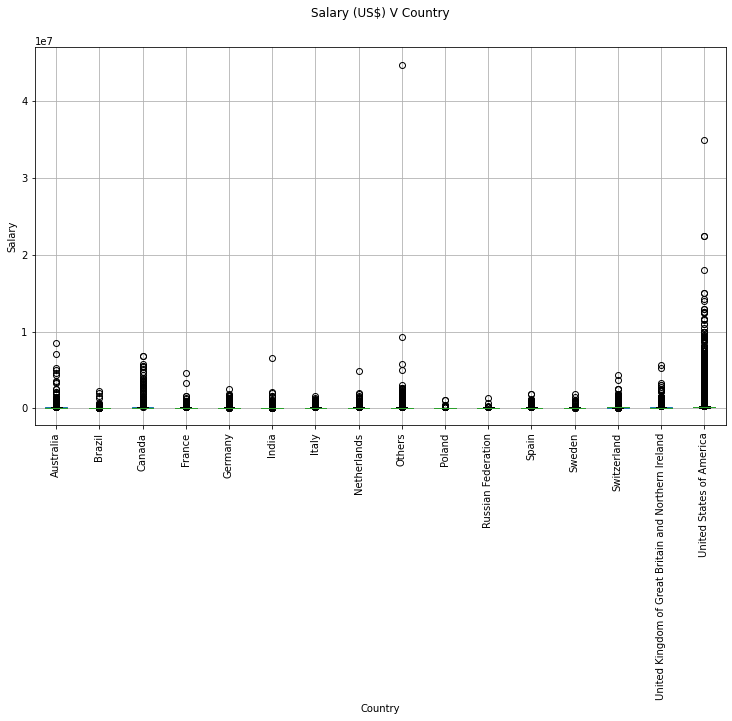

In [15]:
#plotting a boxplot between countries and salaries
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

### from the above boxplot we can see that united states has the highest number of outliers tan the rest and we can't feed our model with such hence we will set a range of the salaries

In [16]:
#setiting range
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
#drop the others column
df = df[df['Country'] != 'Other']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


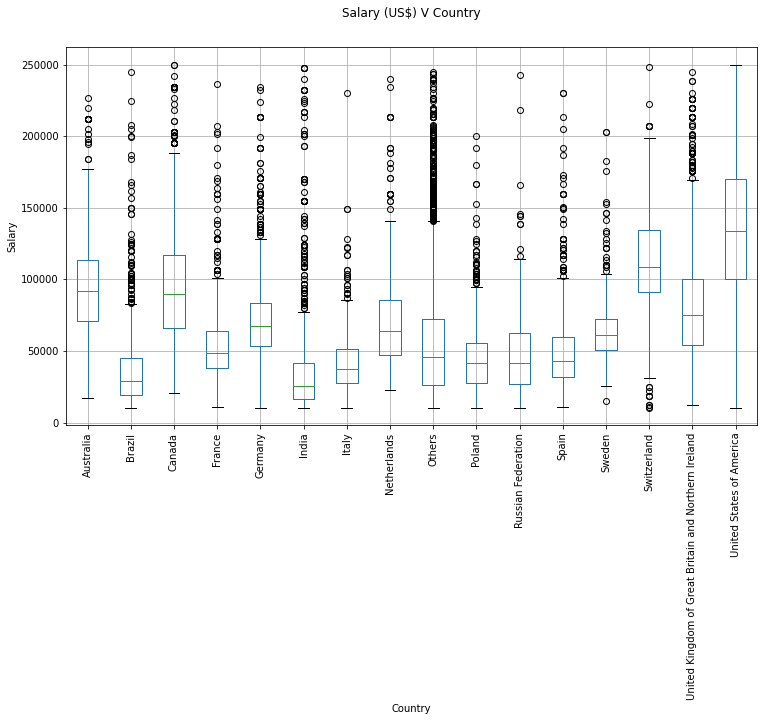

In [17]:
#plotting a boxplot between countries and salaries
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
""" This function will convert years of experience
to float and remove wording
"""
def clean_experience(x):
  if x == "More than 50 years":
    return 50
  if x == 'Less than 1 year':
    return 0.5
  return float(x)

#applying the function
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [19]:
df['YearsCodePro'].unique()

array([ 5. , 17. ,  6. ,  2. ,  4. , 10. , 22. , 20. ,  9. , 14. , 21. ,
       15. ,  3. , 25. ,  7. ,  8. , 12. , 19. , 24. ,  1. , 11. , 23. ,
        0.5, 18. , 37. , 46. , 13. , 32. , 27. , 28. , 16. , 31. , 30. ,
       34. , 35. , 26. , 42. , 38. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [20]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [21]:
""" This function will take education column
and print just meangful names as directed
"""
def clean_education(x):
  if "Bachelor’s degree" in x:
    return "Bachelor's degree"
  if "Master’s degree" in x:
    return "Masters's degree"
  if "Professional degree" in x or "Other doctoral" in x:
    return "post grad"
  return "Less than a Bachelors"

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [22]:
df["EdLevel"].unique()

array(["Masters's degree", "Bachelor's degree", 'Less than a Bachelors',
       'post grad'], dtype=object)

## Data encoding

In [23]:
#encoding education column
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()


array([2, 0, 1, 3])

In [24]:
# Encoding country column
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()


array([14,  8,  7, 15,  6,  2,  4,  9,  3,  1, 12, 11,  5, 13,  0, 10])

splitting data into target and features

In [25]:
X = df.drop('Salary',axis=1)
y = df['Salary']

fitting the model

In [26]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [27]:
#predicting
y_pred = linear_reg.predict(X)

In [28]:
# calculating the mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))

error

44081.09220305773

our model s off by 44k which is huge

let try another algorithm

In [29]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred = dec_tree_reg.predict(X)

In [31]:
error_2 = np.sqrt(mean_squared_error(y, y_pred))
error_2

33798.4582580625

In [32]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor,parameters, scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [34]:
regressor = gs.best_estimator_
regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error_3 =np.sqrt(mean_squared_error(y,y_pred))

In [44]:
X = np.array([["Canada", "Masters's degree",15]])
X

array([['Canada', "Masters's degree", '15']], dtype='<U21')

In [45]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X = X.astype(float)
X

array([[ 2.,  2., 15.]])

In [46]:
y_pred = regressor.predict(X)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([124533.08])

saving the model

In [36]:
import pickle


In [37]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
  pickle.dump(data, file)

loading and predicting with new data

In [47]:
with open('saved_steps.pkl', 'rb') as file:
  data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]


In [48]:
y_pred = regressor_loaded.predict(X)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([124533.08])